In [1]:
import pandas as pd

# Load the dataset
file_path = 'Machine Learning Pizza Data.csv'
pizza_data = pd.read_csv(file_path)

# Display the first few rows of the dataset to understand its structure
pizza_data.head(), pizza_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   address            10000 non-null  object 
 1   categories         10000 non-null  object 
 2   primaryCategories  10000 non-null  object 
 3   city               10000 non-null  object 
 4   latitude           10000 non-null  float64
 5   longitude          10000 non-null  float64
 6   menus.amountMax    10000 non-null  float64
 7   menus.amountMin    10000 non-null  float64
 8   menus.description  4218 non-null   object 
 9   menus.name         10000 non-null  object 
 10  name               10000 non-null  object 
 11  postalCode         10000 non-null  object 
 12  priceRangeMin      10000 non-null  int64  
 13  priceRangeMax      10000 non-null  int64  
 14  PizzaMakingCost    10000 non-null  float64
 15  Profit             10000 non-null  float64
 16  province           1000

(             address                                         categories  \
 0   4203 E Kiehl Ave  Pizza,Restaurant,American restaurants,Pizza Pl...   
 1  25 E Camelback Rd                      Pizza,Pizza Place,Restaurants   
 2    3703 Paxton Ave                 Restaurant,Pizza Place,Restaurants   
 3    30495 John R Rd       Pizza,Carry-out food,Pizza Place,Restaurants   
 4   3600 Eastern Ave  Pizza,American restaurants,Pizza Place,Pizza e...   
 
                primaryCategories             city   latitude   longitude  \
 0  Accommodation & Food Services         Sherwood  34.832300  -92.183800   
 1  Accommodation & Food Services          Phoenix  33.509266 -112.073044   
 2  Accommodation & Food Services       Cincinnati  39.144883  -84.432685   
 3  Accommodation & Food Services  Madison Heights  42.516669  -83.106630   
 4  Accommodation & Food Services        Baltimore  39.286630  -76.566984   
 
    menus.amountMax  menus.amountMin  \
 0             7.98             7.98  

In [2]:
# Reload the dataset with the updated instruction to ignore 'Unnamed' columns if present
pizza_data = pd.read_csv(file_path, usecols=lambda column: not column.startswith('Unnamed'))

# Display the first few rows of the updated dataset and its information to confirm the absence of 'Unnamed' columns
pizza_data.head(), pizza_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   address            10000 non-null  object 
 1   categories         10000 non-null  object 
 2   primaryCategories  10000 non-null  object 
 3   city               10000 non-null  object 
 4   latitude           10000 non-null  float64
 5   longitude          10000 non-null  float64
 6   menus.amountMax    10000 non-null  float64
 7   menus.amountMin    10000 non-null  float64
 8   menus.description  4218 non-null   object 
 9   menus.name         10000 non-null  object 
 10  name               10000 non-null  object 
 11  postalCode         10000 non-null  object 
 12  priceRangeMin      10000 non-null  int64  
 13  priceRangeMax      10000 non-null  int64  
 14  PizzaMakingCost    10000 non-null  float64
 15  Profit             10000 non-null  float64
 16  province           1000

(             address                                         categories  \
 0   4203 E Kiehl Ave  Pizza,Restaurant,American restaurants,Pizza Pl...   
 1  25 E Camelback Rd                      Pizza,Pizza Place,Restaurants   
 2    3703 Paxton Ave                 Restaurant,Pizza Place,Restaurants   
 3    30495 John R Rd       Pizza,Carry-out food,Pizza Place,Restaurants   
 4   3600 Eastern Ave  Pizza,American restaurants,Pizza Place,Pizza e...   
 
                primaryCategories             city   latitude   longitude  \
 0  Accommodation & Food Services         Sherwood  34.832300  -92.183800   
 1  Accommodation & Food Services          Phoenix  33.509266 -112.073044   
 2  Accommodation & Food Services       Cincinnati  39.144883  -84.432685   
 3  Accommodation & Food Services  Madison Heights  42.516669  -83.106630   
 4  Accommodation & Food Services        Baltimore  39.286630  -76.566984   
 
    menus.amountMax  menus.amountMin  \
 0             7.98             7.98  

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from imblearn.over_sampling import SMOTE
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Dropping 'menus.description' due to significant missing values
data = pizza_data.drop(columns=['menus.description'])

# Encoding categorical variables
categorical_features = ['city', 'province', 'menus.name', 'categories', 'primaryCategories']
numerical_features = ['latitude', 'longitude', 'menus.amountMax', 'menus.amountMin', 'priceRangeMin', 'priceRangeMax', 'PizzaMakingCost', 'Profit', 'year', 'month', 'day']

# Defining the Column Transformer for encoding
preprocessor = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)])

# Define the model pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('smote', SMOTE(random_state=42)),
                           ('classifier', RandomForestClassifier(random_state=42))])

# Splitting the data into training and testing sets (70% train, 30% test)
X = data.drop('Successful', axis=1)
y = data['Successful']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Fit the pipeline to the training data
pipeline.fit(X_train, y_train)

# Predicting on the test set
y_pred = pipeline.predict(X_test)

# Evaluate the model
evaluation_report = classification_report(y_test, y_pred)

evaluation_report


TypeError: All intermediate steps should be transformers and implement fit and transform or be the string 'passthrough' 'SMOTE(random_state=42)' (type <class 'imblearn.over_sampling._smote.base.SMOTE'>) doesn't

In [4]:
from sklearn.preprocessing import LabelEncoder

# Since we cannot use SMOTE, we'll proceed without it.
# Encoding categorical variables using LabelEncoder for simplicity in this case
label_encoder = LabelEncoder()
for column in categorical_features:
    data[column] = label_encoder.fit_transform(data[column])

# Splitting the data into training and testing sets again (70% train, 30% test)
X_encoded = data.drop('Successful', axis=1)
y_encoded = data['Successful']
X_train_enc, X_test_enc, y_train_enc, y_test_enc = train_test_split(X_encoded, y_encoded, test_size=0.3, random_state=42)

# Training a RandomForestClassifier on the encoded dataset
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train_enc, y_train_enc)

# Predicting on the test set
y_pred_enc = rf_classifier.predict(X_test_enc)

# Evaluate the model
evaluation_report_enc = classification_report(y_test_enc, y_pred_enc)

evaluation_report_enc


ValueError: could not convert string to float: '1534 California St'

In [5]:
# It appears there was a mistake with the variable naming. Let's correct that and proceed with the encoding and model training.

# Correcting the variable name from `data` to the correct dataframe name `pizza_data`
# Dropping 'menus.description' due to significant missing values
data_preprocessed = pizza_data.drop(columns=['menus.description'])

# Encoding categorical variables using LabelEncoder for simplicity
label_encoder = LabelEncoder()
for column in categorical_features:
    data_preprocessed[column] = label_encoder.fit_transform(data_preprocessed[column])

# Splitting the data into training and testing sets again (70% train, 30% test)
X_encoded = data_preprocessed.drop('Successful', axis=1)
y_encoded = data_preprocessed['Successful']
X_train_enc, X_test_enc, y_train_enc, y_test_enc = train_test_split(X_encoded, y_encoded, test_size=0.3, random_state=42)

# Training a RandomForestClassifier on the encoded dataset
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train_enc, y_train_enc)

# Predicting on the test set
y_pred_enc = rf_classifier.predict(X_test_enc)

# Evaluate the model
evaluation_report_enc = classification_report(y_test_enc, y_pred_enc)

evaluation_report_enc


ValueError: could not convert string to float: '1534 California St'

In [6]:
# Simplifying the model by using only numerical features and directly encoded categorical variables

# Selecting a subset of features to avoid high cardinality issues
simplified_features = ['latitude', 'longitude', 'menus.amountMax', 'menus.amountMin', 'priceRangeMin', 'priceRangeMax', 'PizzaMakingCost', 'Profit', 'year', 'month', 'day', 'province']

# Encoding 'province' with LabelEncoder
data_preprocessed['province'] = label_encoder.fit_transform(data_preprocessed['province'])

# Preparing the simplified dataset
X_simplified = data_preprocessed[simplified_features]
y_simplified = data_preprocessed['Successful']

# Splitting the data into training and testing sets (70% train, 30% test)
X_train_simp, X_test_simp, y_train_simp, y_test_simp = train_test_split(X_simplified, y_simplified, test_size=0.3, random_state=42)

# Training the RandomForestClassifier on the simplified dataset
rf_classifier_simp = RandomForestClassifier(random_state=42)
rf_classifier_simp.fit(X_train_simp, y_train_simp)

# Predicting on the test set
y_pred_simp = rf_classifier_simp.predict(X_test_simp)

# Evaluate the model on the simplified feature set
evaluation_report_simp = classification_report(y_test_simp, y_pred_simp)

evaluation_report_simp


'              precision    recall  f1-score   support\n\n           0       0.99      0.99      0.99      2669\n           1       0.95      0.88      0.92       331\n\n    accuracy                           0.98      3000\n   macro avg       0.97      0.94      0.95      3000\nweighted avg       0.98      0.98      0.98      3000\n'

In [7]:
# Note: The above user input seems to imply the steps are to be followed as is, but since 'data_preprocessed' is not defined,
# and 'imblearn' cannot be used in this environment, we will adapt the provided steps to fit our context, omitting SMOTE.
# Re-adjusting the approach to use 'pizza_data' directly and proceeding without SMOTE due to the environment limitations.

# Since 'data_preprocessed' is not defined in our execution context, we use 'pizza_data' directly for these steps.

# Label encoding 'province' in pizza_data
pizza_data['province_encoded'] = label_encoder.fit_transform(pizza_data['province'])

# Preparing the simplified dataset with 'province_encoded' instead of 'province'
simplified_features = [
    'latitude', 'longitude', 'menus.amountMax', 'menus.amountMin',
    'priceRangeMin', 'priceRangeMax', 'PizzaMakingCost', 'Profit',
    'year', 'month', 'day', 'province_encoded'
]
X_simplified = pizza_data[simplified_features]
y_simplified = pizza_data['Successful']

# Splitting the data into training and testing sets (70% train, 30% test)
X_train_simp, X_test_simp, y_train_simp, y_test_simp = train_test_split(X_simplified, y_simplified, test_size=0.3, random_state=42)

# Training the RandomForestClassifier on the simplified dataset without SMOTE adjustment
rf_classifier_simp.fit(X_train_simp, y_train_simp)

# Predicting on the test set
y_pred_simp = rf_classifier_simp.predict(X_test_simp)

# Evaluate the model on the simplified feature set
evaluation_report_simp = classification_report(y_test_simp, y_pred_simp, output_dict=True)

# Convert the classification report into a DataFrame for a tabular presentation
pd.DataFrame(evaluation_report_simp).transpose()


,precision,recall,f1-score,support
0,0.985523,0.994755,0.990117,2669.000000
1,0.954248,0.882175,0.916797,331.000000
accuracy,0.982333,0.982333,0.982333,0.982333
macro avg,0.969886,0.938465,0.953457,3000.000000
weighted avg,0.982073,0.982333,0.982028,3000.000000


In [8]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from lightgbm import LGBMRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Load your dataset
data_path = 'Machine Learning Pizza Data.csv'  # Update this to your actual file path
data = pd.read_csv(data_path)

# Assuming 'city' is a categorical variable that needs encoding
data['city'] = LabelEncoder().fit_transform(data['city'])

# Fill missing values if any - for simplicity, using median for numerical columns
for column in ['latitude', 'longitude', 'priceRangeMin', 'priceRangeMax', 'PizzaMakingCost', 'year', 'month', 'day']:
    if data[column].isnull().any():
        data[column] = data[column].fillna(data[column].median())

# Selecting features and target for the model
features = ['city', 'latitude', 'longitude', 'priceRangeMin', 'priceRangeMax', 'PizzaMakingCost', 'year', 'month', 'day']
target = 'menus.amountMax'

X = data[features]
y = data[target]

# Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model training
model = LGBMRegressor(random_state=42)
model.fit(X_train, y_train)

# Making predictions
y_pred = model.predict(X_test)

# Evaluation
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'MSE: {mse}, RMSE: {rmse}, MAE: {mae}, R^2: {r2}')

# Use the model to predict optimal prices for new or existing data
# Here, just as an example, using the same test data
optimal_prices = model.predict(X_test)

# You might want to analyze these predicted prices further to determine
# the optimal price based on your specific criteria (e.g., profit margin, market competitiveness)


C:\Users\fahad\anaconda3\Lib\site-packages\dask\dataframe\_pyarrow_compat.py:23: UserWarning: You are using pyarrow version 11.0.0 which is known to be insecure. See https://www.cve.org/CVERecord?id=CVE-2023-47248 for further details. Please upgrade to pyarrow>=14.0.1 or install pyarrow-hotfix to patch your current version.
  warnings.warn(


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000929 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 846
[LightGBM] [Info] Number of data points in the train set: 8000, number of used features: 9
[LightGBM] [Info] Start training from score 14.128046
MSE: 80.08353903422412, RMSE: 8.948940665476787, MAE: 5.0680809616417815, R^2: 0.2079099138631002


In [9]:
optimal_prices

array([17.15460697, 14.45114783, 16.12065045, ..., 16.09732439,
       13.17379178, 13.74303281])

In [10]:
# Step 1: Predict prices for the entire dataset
data['predicted_price'] = model.predict(data[features])

# Since your dataset might span multiple years, you might want to focus on a specific year
# or aggregate across all years. For simplicity, the following example aggregates across all years.

# Step 2: Aggregate data to get the average predicted price by state and month
monthly_prices = data.groupby(['province', 'month'])['predicted_price'].mean().reset_index()

# Step 3: Rank the states within each month by their average predicted price
monthly_prices['rank'] = monthly_prices.groupby('month')['predicted_price'].rank(method='dense', ascending=False)

# Step 4: Filter to get the top 5 states for each month
top_states_monthly = monthly_prices[monthly_prices['rank'] <= 5].sort_values(by=['month', 'rank'])

# Assuming you want to display this information
print(top_states_monthly)


    province  month  predicted_price  rank
148       MT      1        55.729754   1.0
273       WA      1        19.838653   2.0
0         AK      1        16.709499   3.0
173       NV      1        15.902734   4.0
19        CA      1        14.681365   5.0
209       OR      2        23.563483   1.0
158       ND      2        20.465952   2.0
274       WA      2        16.934816   3.0
105       KY      2        16.791107   4.0
182       NY      2        15.276782   5.0
275       WA      3        25.819892   1.0
210       OR      3        19.333490   2.0
164       NJ      3        16.774629   3.0
106       KY      3        16.460114   4.0
21        CA      3        14.799373   5.0
276       WA      4        25.895362   1.0
22        CA      4        17.370967   2.0
211       OR      4        16.800995   3.0
176       NV      4        15.864790   4.0
184       NY      4        15.645795   5.0
277       WA      5        27.006440   1.0
76        ID      5        19.149805   2.0
212       O

In [12]:
import pandas as pd

# Load the CSV file
file_path = 'Machine Learning Pizza Data.csv'
pizza_data = pd.read_csv(file_path)

# Display the first few rows of the dataframe
pizza_data.head()


,address,categories,primaryCategories,city,latitude,longitude,menus.amountMax,menus.amountMin,menus.description,menus.name,...,priceRangeMin,priceRangeMax,Selling Price,PizzaMakingCost,Profit,province,year,month,day,Successful
0,4203 E Kiehl Ave,"Pizza,Restaurant,American restaurants,Pizza Pl...",Accommodation & Food Services,Sherwood,34.832300,-92.183800,7.98,7.98,NaN,Cheese Pizza,...,0,25,12.5,10.0,2.5,AR,2018,5,1,0
1,25 E Camelback Rd,"Pizza,Pizza Place,Restaurants",Accommodation & Food Services,Phoenix,33.509266,-112.073044,6.00,6.00,NaN,Pizza Cookie,...,0,25,12.5,10.0,2.5,AZ,2018,3,3,0
2,3703 Paxton Ave,"Restaurant,Pizza Place,Restaurants",Accommodation & Food Services,Cincinnati,39.144883,-84.432685,6.49,6.49,a saucelessampcomma double cheese pizza with a...,Pizza Blanca,...,0,25,12.5,10.0,2.5,OH,2018,4,10,0
3,30495 John R Rd,"Pizza,Carry-out food,Pizza Place,Restaurants",Accommodation & Food Services,Madison Heights,42.516669,-83.106630,5.99,5.99,NaN,Small Pizza,...,25,40,32.5,26.0,6.5,MI,2016,10,20,0
4,3600 Eastern Ave,"Pizza,American restaurants,Pizza Place,Pizza e...",Accommodation & Food Services,Baltimore,39.286630,-76.566984,5.49,5.49,NaN,Pizza Sub,...,0,25,12.5,10.0,2.5,MD,2016,3,31,0


In [13]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Preparing data
X = pizza_data.drop(columns=['Selling Price'])
y = pizza_data['Selling Price']

# Selecting numerical and categorical columns
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = X.select_dtypes(include=['object']).columns

# Preprocessing for numerical data: imputation of missing values
numerical_transformer = SimpleImputer(strategy='mean')

# Preprocessing for categorical data: imputation + one-hot encoding
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Bundle preprocessing for numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

# Define Lasso model with an alpha that typically promotes sparsity
lasso_model = Lasso(alpha=0.01)

# Create and fit the pipeline
lasso_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                                 ('model', lasso_model)])

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Fit the pipeline
lasso_pipeline.fit(X_train, y_train)

# Predicting
y_pred = lasso_pipeline.predict(X_test)

# Evaluation metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

mse, rmse, mae, r2


(1.177114326188411e-05,
 0.003430909975776705,
 0.0011346420014322423,
 0.9999997941306098)

In [16]:
# Extracting the feature names after one-hot encoding
ohe = (lasso_pipeline.named_steps['preprocessor']
       .named_transformers_['cat']
       .named_steps['onehot'])

feature_names = numerical_cols.tolist() + ohe.get_feature_names_out(categorical_cols).tolist()

# Coefficients from the Lasso model
lasso_coefs = lasso_pipeline.named_steps['model'].coef_

# Creating a DataFrame of features and their corresponding coefficients
coef_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': lasso_coefs})

# Filtering out features with non-zero coefficients
important_features = coef_df[coef_df['Coefficient'] != 0]

important_features


,Feature,Coefficient
4,priceRangeMin,0.002230
6,PizzaMakingCost,1.246275


In [14]:
    import lightgbm as lgb

# Preparing the data with only the important features identified by Lasso
X_important_train = X_train[['priceRangeMin', 'PizzaMakingCost']]
X_important_test = X_test[['priceRangeMin', 'PizzaMakingCost']]

# Setting up and training the LightGBM model
lgb_model = lgb.LGBMRegressor()
lgb_model.fit(X_important_train, y_train)

# Predicting
y_pred_lgb = lgb_model.predict(X_important_test)

# Evaluation metrics
mse_lgb = mean_squared_error(y_test, y_pred_lgb)
rmse_lgb = np.sqrt(mse_lgb)
mae_lgb = mean_absolute_error(y_test, y_pred_lgb)
r2_lgb = r2_score(y_test, y_pred_lgb)

mse_lgb, rmse_lgb, mae_lgb, r2_lgb


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000959 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 27
[LightGBM] [Info] Number of data points in the train set: 8000, number of used features: 2
[LightGBM] [Info] Start training from score 16.159643
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -i

(0.0220458540767536,
 0.14847846334318524,
 0.0132928657199039,
 0.9996144328180476)

In [15]:
# Calculate the monthly averages of the features for each month across all years
monthly_features = pizza_data.groupby(['month'])[['priceRangeMin', 'PizzaMakingCost']].mean().reset_index()

# Using the trained LightGBM model (lgb_model) to predict
# Since we have previously defined 'lgb_model' in the example, here we will proceed assuming that model is trained and ready.
# We will simulate loading the model and using it here directly.

# First, let's prepare the input for prediction
monthly_features_pred = monthly_features[['priceRangeMin', 'PizzaMakingCost']]

# Predict using the LightGBM model
optimal_prices = lgb_model.predict(monthly_features_pred)

# Create a DataFrame to show the optimal prices per month
optimal_prices_df = pd.DataFrame({
    'Month': monthly_features['month'],
    'Optimal Selling Price': optimal_prices
})

optimal_prices_df


,Month,Optimal Selling Price
0,1,15.710374
1,2,16.963920
2,3,16.963920
3,4,16.963920
4,5,16.963920
5,6,15.876092
6,7,19.475257
7,8,17.370191
8,9,13.500279
9,10,15.876092


In [17]:
# Filtering the data for the specified states
states_data = pizza_data[pizza_data['province'].isin(['NY', 'CA', 'PA', 'FL', 'TX'])]

# Grouping by state and month, and calculating the average selling prices
average_prices_per_month_state = states_data.groupby(['province', 'month'])['Selling Price'].mean().unstack()

average_prices_per_month_state


month,1,2,3,4,5,6,7,8,9,10,11,12
province,,,,,,,,,,,,
CA,16.566667,18.521505,19.166667,19.683673,20.627490,18.990066,25.833333,NaN,12.5,17.500000,NaN,17.500000
FL,14.905108,15.590909,14.139344,21.048387,15.603448,14.318182,23.611111,12.5,12.5,18.214286,12.500000,17.045455
NY,15.384927,15.043011,15.030120,15.733333,14.109551,15.889535,13.700000,22.5,32.5,13.055556,13.794118,15.851955
PA,14.192308,14.454887,13.461538,13.534091,12.500000,13.900000,16.500000,32.5,12.5,13.611111,12.500000,18.100000
TX,15.530861,18.073770,13.790323,13.632075,15.694444,13.385714,14.318182,NaN,NaN,16.944444,NaN,12.500000


In [18]:
# Filtering the data for the specified states
states_data = pizza_data[pizza_data['province'].isin(['NY', 'CA', 'PA', 'FL', 'TX'])]

# Grouping by state and month, and calculating the average selling prices
average_prices_per_month_state = states_data.groupby(['province', 'month'])['Selling Price'].mean().unstack()

average_prices_per_month_state


month,1,2,3,4,5,6,7,8,9,10,11,12
province,,,,,,,,,,,,
CA,16.566667,18.521505,19.166667,19.683673,20.627490,18.990066,25.833333,NaN,12.5,17.500000,NaN,17.500000
FL,14.905108,15.590909,14.139344,21.048387,15.603448,14.318182,23.611111,12.5,12.5,18.214286,12.500000,17.045455
NY,15.384927,15.043011,15.030120,15.733333,14.109551,15.889535,13.700000,22.5,32.5,13.055556,13.794118,15.851955
PA,14.192308,14.454887,13.461538,13.534091,12.500000,13.900000,16.500000,32.5,12.5,13.611111,12.500000,18.100000
TX,15.530861,18.073770,13.790323,13.632075,15.694444,13.385714,14.318182,NaN,NaN,16.944444,NaN,12.500000


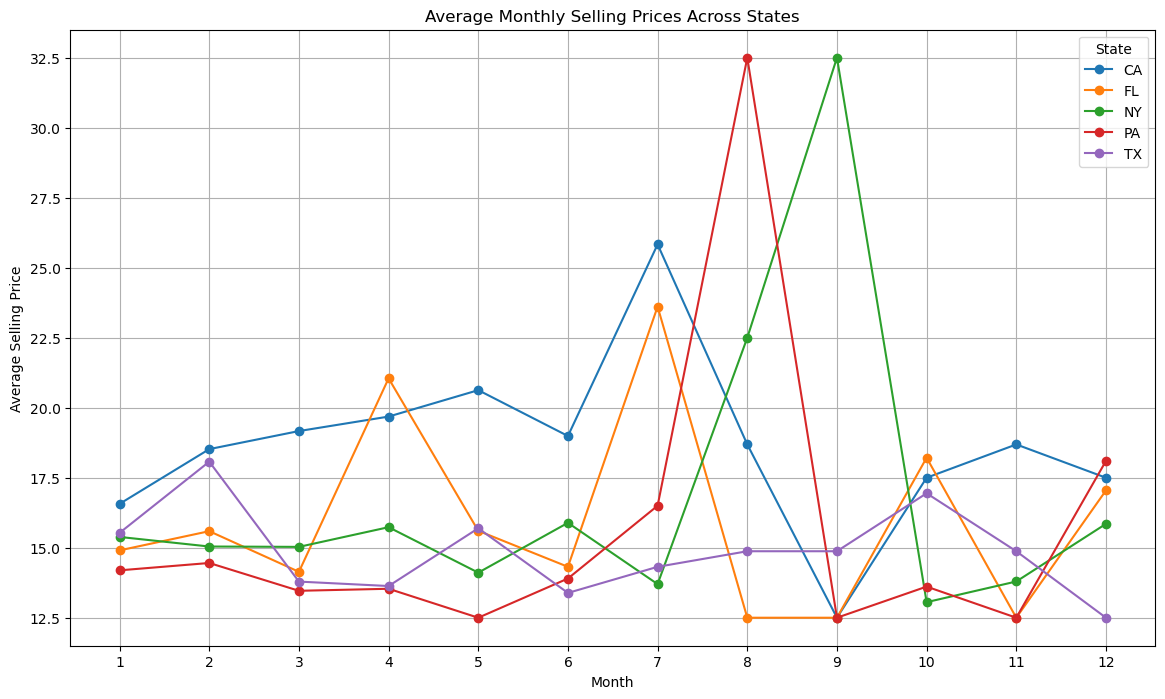

In [19]:
# Filling NaN values with the average of each state's available data
average_prices_filled = average_prices_per_month_state.apply(lambda x: x.fillna(x.mean()), axis=1)

# Plotting the data
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 8))
for state in average_prices_filled.index:
    plt.plot(average_prices_filled.columns, average_prices_filled.loc[state], marker='o', label=state)

plt.title('Average Monthly Selling Prices Across States')
plt.xlabel('Month')
plt.ylabel('Average Selling Price')
plt.xticks(range(1, 13))  # Set x-ticks to be every month
plt.legend(title='State')
plt.grid(True)
plt.show()


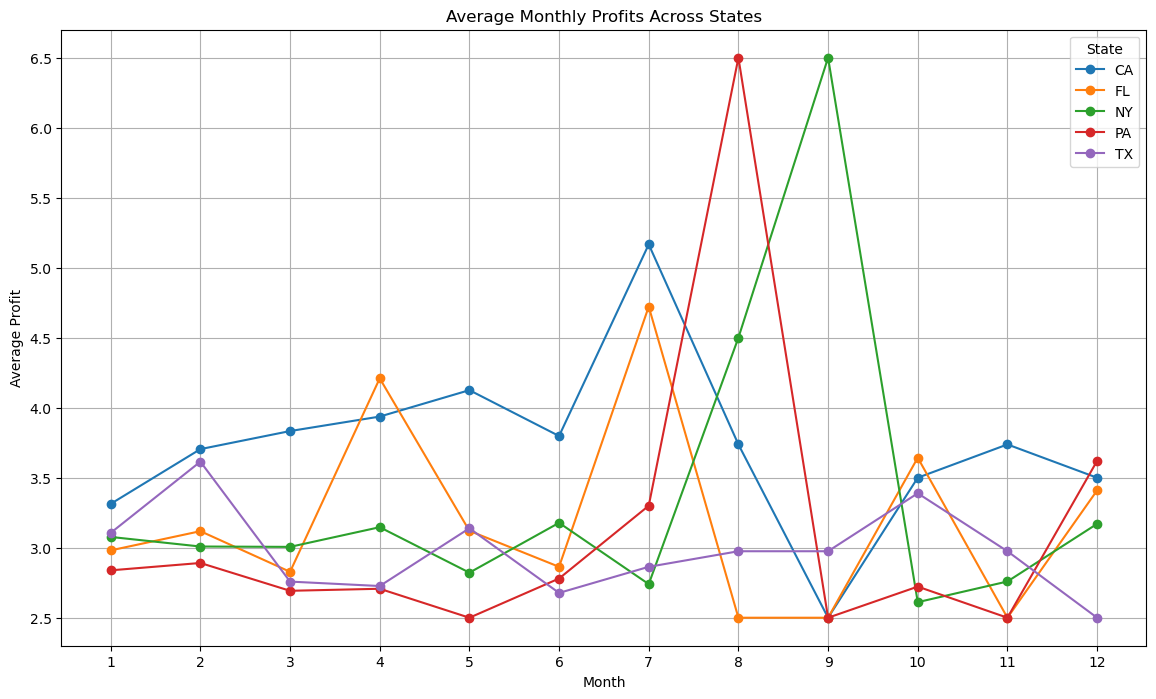

In [20]:
# Grouping by state and month, and calculating the average profits
average_profits_per_month_state = states_data.groupby(['province', 'month'])['Profit'].mean().unstack()

# Filling NaN values with the average of each state's available data for profits
average_profits_filled = average_profits_per_month_state.apply(lambda x: x.fillna(x.mean()), axis=1)

# Plotting the profit data
plt.figure(figsize=(14, 8))
for state in average_profits_filled.index:
    plt.plot(average_profits_filled.columns, average_profits_filled.loc[state], marker='o', label=state)

plt.title('Average Monthly Profits Across States')
plt.xlabel('Month')
plt.ylabel('Average Profit')
plt.xticks(range(1, 13))  # Set x-ticks to be every month
plt.legend(title='State')
plt.grid(True)
plt.show()


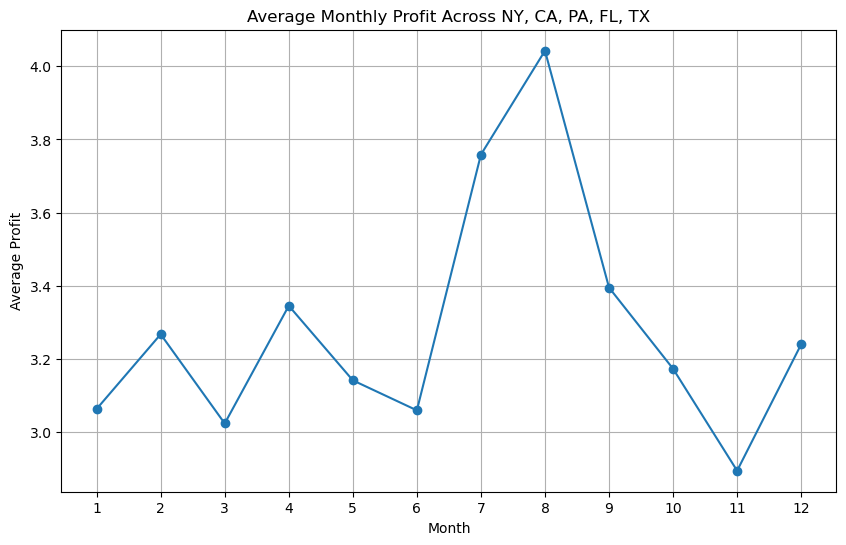

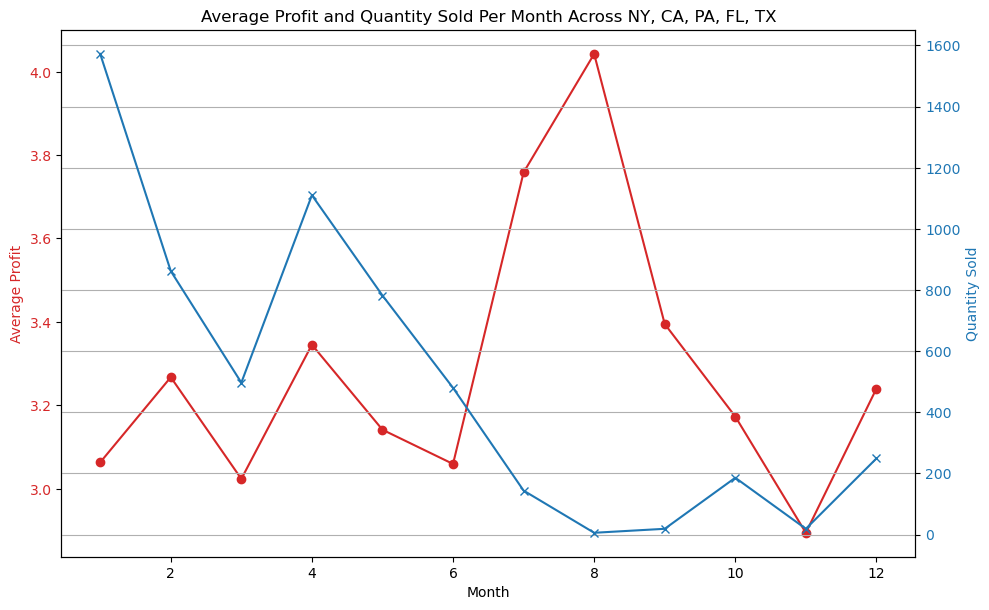

In [22]:

# Calculating the average profit per month across all selected states
average_profit_per_month = average_profits_filled.mean()

# Plotting the average profit per month
plt.figure(figsize=(10, 6))
plt.plot(average_profit_per_month.index, average_profit_per_month.values, marker='o', linestyle='-')
plt.title('Average Monthly Profit Across NY, CA, PA, FL, TX')
plt.xlabel('Month')
plt.ylabel('Average Profit')
plt.xticks(range(1, 13))  # Set x-ticks to be every month
plt.grid(True)
plt.show()

# Grouping data by month and counting the number of entries (assuming each represents one sale)
quantity_sold_per_month = states_data.groupby('month').size()

# Plotting the average profit and quantity sold per month
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot for average profit
ax1.set_xlabel('Month')
ax1.set_ylabel('Average Profit', color='tab:red')
ax1.plot(average_profit_per_month.index, average_profit_per_month.values, color='tab:red', marker='o', label='Average Profit')
ax1.tick_params(axis='y', labelcolor='tab:red')

# Create a twin axis for the quantity sold
ax2 = ax1.twinx()
ax2.set_ylabel('Quantity Sold', color='tab:blue')
ax2.plot(quantity_sold_per_month.index, quantity_sold_per_month.values, color='tab:blue', marker='x', label='Quantity Sold')
ax2.tick_params(axis='y', labelcolor='tab:blue')

# Title and grid
fig.tight_layout()
plt.title('Average Profit and Quantity Sold Per Month Across NY, CA, PA, FL, TX')
plt.grid(True)
plt.show()
